# Numerical Analysis 2017 Fall - Final

### Group 12 - 김명혁 & 조영우
### 2017.12.23

In [1]:
import sys
import timeit
import scipy as sp
import numpy as np
import sympy as sym
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
sym.init_printing()

#plt.rc('text', usetex = True)
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "15"

print('python version : ', sys.version)
print('numpy version : ', np.version.version)
print('sympy version : ', sym.__version__)
print('scipy version : ', sp.__version__)
print('matplotlib version :', mpl.__version__)

python version :  3.6.2 |Anaconda custom (64-bit)| (default, Sep 19 2017, 08:03:39) [MSC v.1900 64 bit (AMD64)]
numpy version :  1.13.1
sympy version :  1.1.1
scipy version :  0.19.1
matplotlib version : 2.0.2


## Problem 1
Find a minimum of $f(x,y) = 100(y-x^2)^2 + (1-x)^2$ using<p>
(a) Steepest descent<br>
(b) Newton<p>
from each of the three starting points
$\begin{pmatrix} -1 \\ 1 \end{pmatrix}, \begin{pmatrix} 0 \\ 1 \end{pmatrix}, \begin{pmatrix} 2 \\ 1 \end{pmatrix}$

위 함수의 Critical Point 를 찾기 위해, 편미분 값이 0 이 되는 지점을 찾는다.<p>
$$
\begin{cases}
    \frac{\partial f}{\partial x} = -400.0xy + 400x^3 + 2x - 2 = 0 \\
    \frac{\partial f}{\partial y} = 200.0(y - x^2) = 0
\end{cases}
$$
<p>
이를 만족하는 지점은 다음과 같다.<p>

$$
\begin{cases}
    x = 1 \\
    y = 1
\end{cases}
$$
<p>
이는 직관적으로 생각하면 제곱의 합이므로, 각 항이 0 이 되게 만드는 지점에서 Minimum $0$ 을 가진다.<br>
즉, $y - x^2 = 0, 1 - x = 0$ 을 만족하는 지점인 $x = 1, y = 1$ 에서 Minimum $0$ 인 것이다.<br>
Steepest Descent 와 Newton 에 대해, 각 Starting Point 에서 Minimum 값 $0$ 이 나오는지 확인하였다.

In [2]:
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D

def p1_f(x):
    
    return 100.0 * ((x[1] - x[0] ** 2.0) ** 2.0) + (1.0 - x[0]) ** 2.0

def p1_df(x):
    
    return np.array([-400.0 * x[0] * x[1] + 400.0 * x[0] ** 3.0 + 2.0 * x[0] - 2.0, 200.0 * (x[1] - x[0] ** 2.0)])

def steepestDescent(f, df, x0, maxIter = 50000, rate = 1e-3, tol = 1e-8):
    
    i = 0
    x_now = x0
    
    while True:
        
        x_new = x_now - rate * df(x_now)
        
        if i > maxIter:
            
            break
            
        elif np.all(np.abs(x_now - x_new) / np.abs(x_new) < tol):
            
            break
        
        x_now = x_new
        i = i + 1
        
    return {'minimum' : f(x_new), 'x' :  x_new, 'iter' : i}

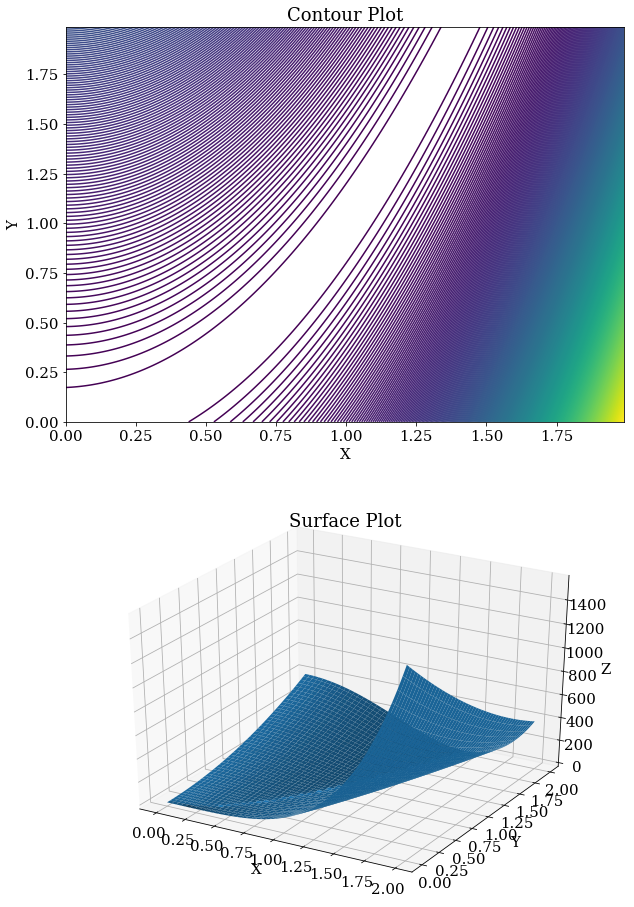

In [3]:
x = np.arange(0.0, 2.0, 0.01)
y = np.arange(0.0, 2.0, 0.01)

X, Y = np.meshgrid(x, y)
Z = np.array([p1_f([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

fig = plt.figure(figsize = (10, 16))
ax_2d = fig.add_subplot(211)
ax_3d = fig.add_subplot(212, projection = '3d')

ax_2d.contour(X, Y, Z, 500)
ax_3d.plot_surface(X, Y, Z)

ax_2d.set_title('Contour Plot')
ax_3d.set_title('Surface Plot')
ax_2d.set_xlabel('X')
ax_2d.set_ylabel('Y')
ax_3d.set_xlabel('X')
ax_3d.set_ylabel('Y')
ax_3d.set_zlabel('Z')

plt.show()

In [4]:
timeNow = timeit.default_timer()
descentResult1 = steepestDescent(p1_f, p1_df, (-1.0, 1.0))
descentTime1 = timeit.default_timer() - timeNow

timeNow = timeit.default_timer()
descentResult2 = steepestDescent(p1_f, p1_df, (0.0, 1.0))
descentTime2 = timeit.default_timer() - timeNow

timeNow = timeit.default_timer()
descentResult3 = steepestDescent(p1_f, p1_df, (2.0, 1.0))
descentTime3 = timeit.default_timer() - timeNow

print('Minimize f(x, y) from (-1, 1) - Steepest Descent')
print(descentResult1)
print('Elapsed time : ', descentTime1, '\n')

print('Minimize f(x, y) from (0, 1) - Steepest Descent')
print(descentResult2)
print('Elapsed time : ', descentTime2, '\n')

print('Minimize f(x, y) from (2, 1) - Steepest Descent')
print(descentResult3)
print('Elapsed time : ', descentTime3, '\n')

Minimize f(x, y) from (-1, 1) - Steepest Descent
{'minimum': 1.5623168257628811e-10, 'x': array([ 0.99998751,  0.99997497]), 'iter': 25992}
Elapsed time :  0.3336888798265677 

Minimize f(x, y) from (0, 1) - Steepest Descent
{'minimum': 1.5612013559819131e-10, 'x': array([ 0.99998752,  0.99997498]), 'iter': 25250}
Elapsed time :  0.32069043345894477 

Minimize f(x, y) from (2, 1) - Steepest Descent
{'minimum': 1.5618341233063149e-10, 'x': array([ 0.99998751,  0.99997498]), 'iter': 26019}
Elapsed time :  0.33434130283263797 



In [5]:
timeNow = timeit.default_timer()
newtonResult1 = optimize.minimize(p1_f, (-1.0, 1.0), method = 'Newton-CG', jac = p1_df)
newtonTime1 = timeit.default_timer() - timeNow

timeNow = timeit.default_timer()
newtonResult2 = optimize.minimize(p1_f, (0.0, 1.0), method = 'Newton-CG', jac = p1_df)
newtonTime2 = timeit.default_timer() - timeNow

timeNow = timeit.default_timer()
newtonResult3 = optimize.minimize(p1_f, (2.0, 1.0), method = 'Newton-CG', jac = p1_df)
newtonTime3 = timeit.default_timer() - timeNow

print('Minimize f(x, y) from (-1, 1) - Newton')
print(newtonResult1)
print('Elapsed time : ', newtonTime1, '\n')

print('Minimize f(x, y) from (0, 1) - Newton')
print(newtonResult2)
print('Elapsed time : ', newtonTime2, '\n')

print('Minimize f(x, y) from (-2, 1) - Newton')
print(newtonResult3)
print('Elapsed time : ', newtonTime3, '\n')

Minimize f(x, y) from (-1, 1) - Newton
     fun: 6.727279343750223e-12
     jac: array([ 0.00077549, -0.00038956])
 message: 'Optimization terminated successfully.'
    nfev: 82
    nhev: 0
     nit: 62
    njev: 339
  status: 0
 success: True
       x: array([ 0.99999741,  0.99999481])
Elapsed time :  0.019296011531376278 

Minimize f(x, y) from (0, 1) - Newton
     fun: 1.0988667781090292e-11
     jac: array([ 0.00074639, -0.00037576])
 message: 'Optimization terminated successfully.'
    nfev: 38
    nhev: 0
     nit: 28
    njev: 153
  status: 0
 success: True
       x: array([ 0.99999669,  0.99999336])
Elapsed time :  0.007522902131419373 

Minimize f(x, y) from (-2, 1) - Newton
     fun: 7.008218647076055e-17
     jac: array([  8.68035647e-06,  -4.14245287e-06])
 message: 'Optimization terminated successfully.'
    nfev: 15
    nhev: 0
     nit: 13
    njev: 69
  status: 0
 success: True
       x: array([ 1.        ,  0.99999999])
Elapsed time :  0.0023038386838432068 



## Answer 1
주어진 3 개의 Starting Point 에서 Steepest Descent, Newton 모두<br>
$x = 1, y = 1$ 부근에서 Minimum $0$ 를 결과로 내놓았다.<p>
이때, 두 Method 의 실행시간, 정확도가 차이나는 이유는 Tolerance 를 다르게 두었기 때문이다.

## Problem 2
The gamma function is defined by<p>
$$\Gamma \left( x \right) = \int\limits_0^\infty {t^{x - 1} e^{ - t} dt},\quad x > 0$$<p>
For an integer argument $n$, $\Gamma(n) = (n-1)!$, so interpolating the data points<p>

$t$ | $1$ | $2$ | $3$ | $4$ | $5$
--- | --- | --- | --- | --- | --- | 
$y$ | $1$ | $1$ | $2$ | $6$ | $24$

Should yeild an approximation to the gamma function over the given range.<p>
(a) Compute the polynomial of degree four that interpolates these five data points and plot the resulting polynomial.<br>
(b) Use a cubic spline to interpolate the same data and again plot the resulting curve.<br>
(c) Which of the two interpolants is more accurate over most of the domain?<br>
(d) Which of the two interpolants is more accurate between 1 and 2?

In [6]:
from scipy import interpolate
from scipy import special

p2_t = np.array([1, 2, 3, 4, 5])
p2_y = np.array([1, 1, 2, 6, 24])
t_interpol = np.linspace(1.0, 5.0, num = 500)

interpol_poly = np.poly1d(np.polyfit(p2_t, p2_y, 4))
interpol_cubic = interpolate.CubicSpline(p2_t, p2_y)

print(np.polyfit(p2_t, p2_y, 4), '\n')
print(interpol_poly)

[  0.375       -3.41666667  11.625      -16.58333333   9.        ] 

       4         3         2
0.375 x - 3.417 x + 11.63 x - 16.58 x + 9


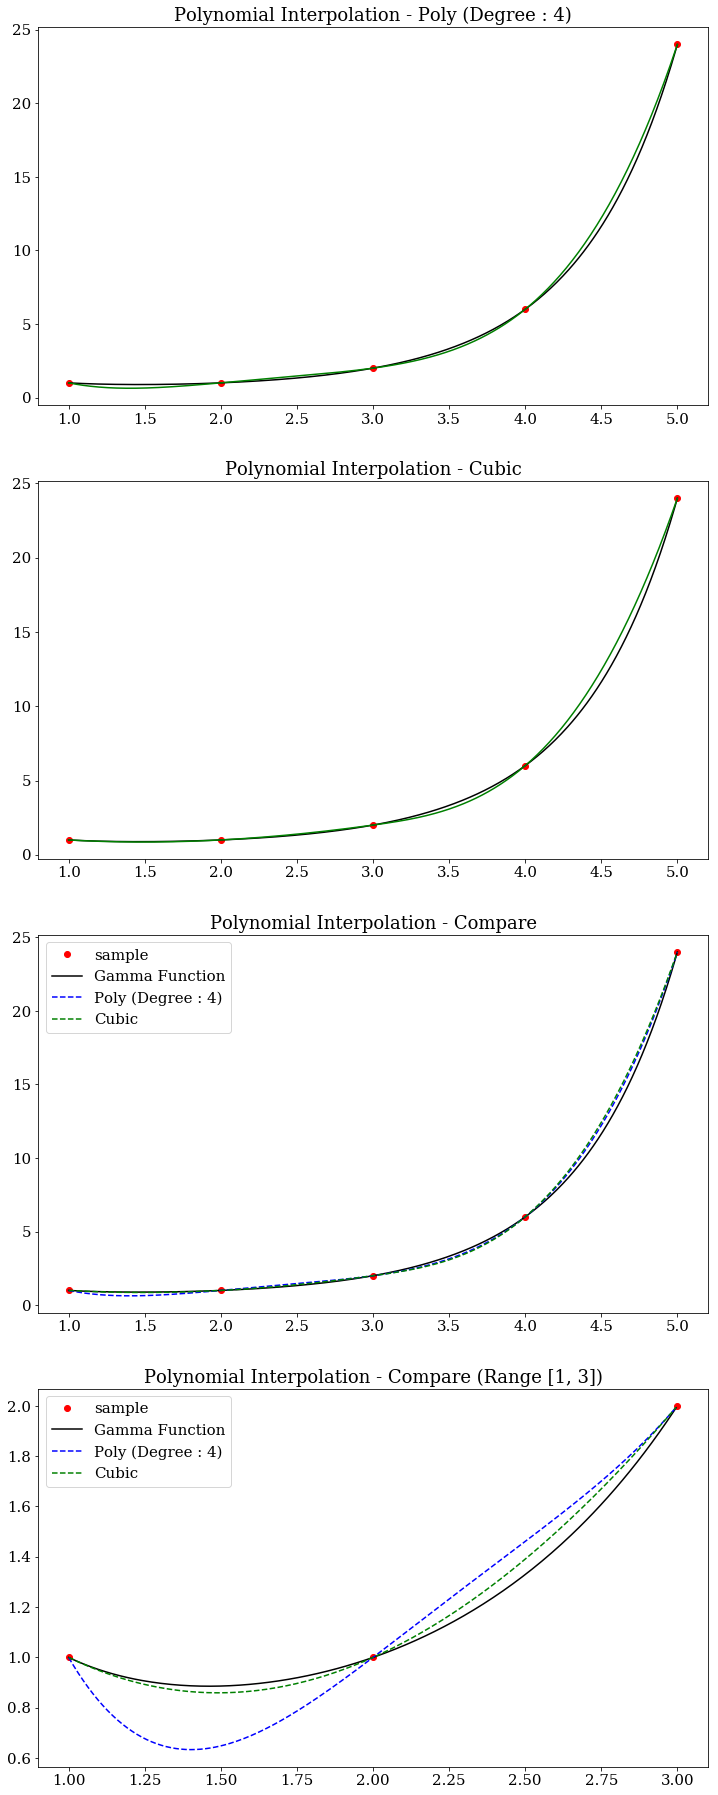

In [7]:
fig, axes = plt.subplots(4, 1, figsize = (12, 32))

axes[0].plot(p2_t, p2_y, 'ro')
axes[1].plot(p2_t, p2_y, 'ro')
axes[2].plot(p2_t, p2_y, 'ro')
axes[3].plot(p2_t[:3], p2_y[:3], 'ro')

axes[0].plot(t_interpol, special.gamma(t_interpol), 'k')
axes[1].plot(t_interpol, special.gamma(t_interpol), 'k')
axes[2].plot(t_interpol, special.gamma(t_interpol), 'k')
axes[3].plot(t_interpol[:250], special.gamma(t_interpol[:250]), 'k')

axes[0].plot(t_interpol, interpol_poly(t_interpol), 'g')
axes[1].plot(t_interpol, interpol_cubic(t_interpol), 'g')

axes[2].plot(t_interpol, interpol_poly(t_interpol), 'b--')
axes[2].plot(t_interpol, interpol_cubic(t_interpol), 'g--')

axes[3].plot(t_interpol[:250], interpol_poly(t_interpol[:250]), 'b--')
axes[3].plot(t_interpol[:250], interpol_cubic(t_interpol[:250]), 'g--')

axes[2].legend(['sample', 'Gamma Function', 'Poly (Degree : 4)', 'Cubic'])
axes[3].legend(['sample', 'Gamma Function', 'Poly (Degree : 4)', 'Cubic'])

axes[0].set_title('Polynomial Interpolation - Poly (Degree : 4)')
axes[1].set_title('Polynomial Interpolation - Cubic')
axes[2].set_title('Polynomial Interpolation - Compare')
axes[3].set_title('Polynomial Interpolation - Compare (Range [1, 3])')

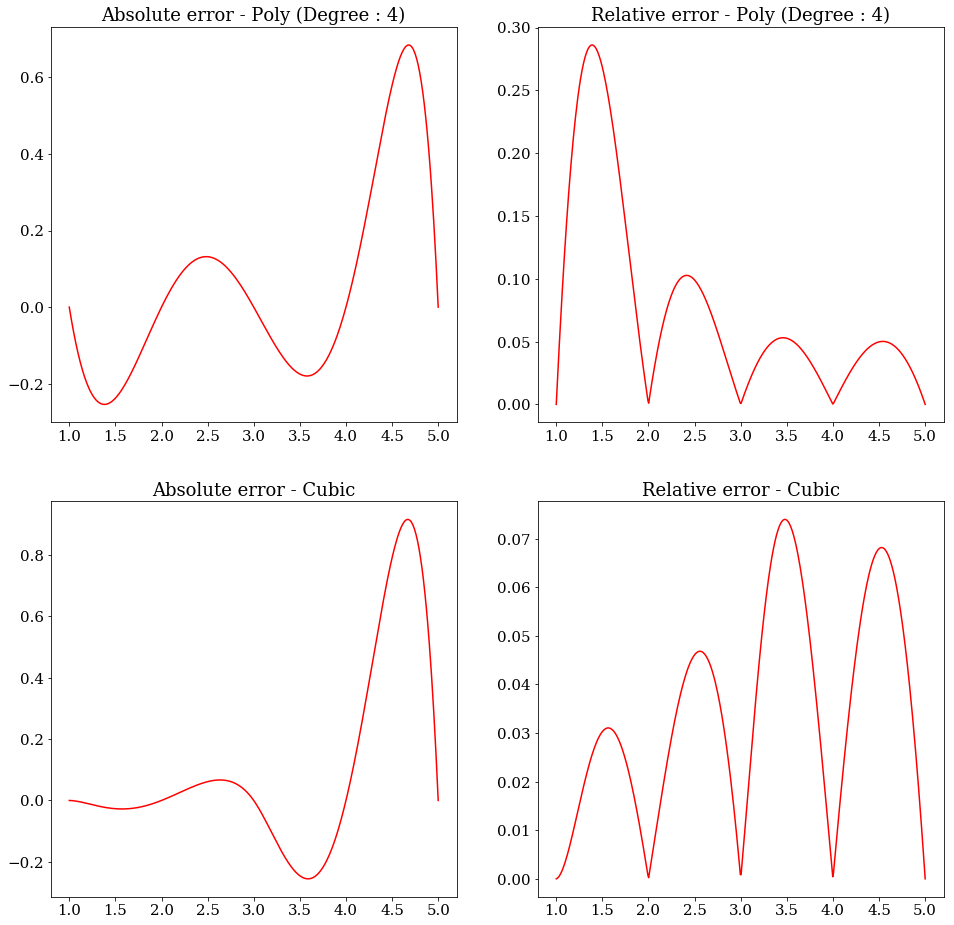

In [8]:
fig, axes = plt.subplots(2, 2, figsize = (16, 16))

absError_poly = interpol_poly(t_interpol) - special.gamma(t_interpol)
absError_cubic = interpol_cubic(t_interpol) - special.gamma(t_interpol)

relError_poly = np.abs(interpol_poly(t_interpol) - special.gamma(t_interpol)) / np.abs(special.gamma(t_interpol))
relError_cubic = np.abs(interpol_cubic(t_interpol) - special.gamma(t_interpol)) / np.abs(special.gamma(t_interpol))

axes[0][0].plot(t_interpol, absError_poly, 'r')
axes[0][1].plot(t_interpol, relError_poly, 'r')
axes[1][0].plot(t_interpol, absError_cubic, 'r')
axes[1][1].plot(t_interpol, relError_cubic, 'r')

axes[0][0].set_title('Absolute error - Poly (Degree : 4)')
axes[0][1].set_title('Relative error - Poly (Degree : 4)')
axes[1][0].set_title('Absolute error - Cubic')
axes[1][1].set_title('Relative error - Cubic')

In [9]:
sum_absError_poly15 = np.power(np.trapz(np.power(np.abs(absError_poly), 2.0), t_interpol), 1.0 / 2.0)
sum_absError_poly12 = np.power(np.trapz(np.power(np.abs(absError_poly[:125]), 2.0), t_interpol[:125]), 1.0 / 2.0)

sum_absError_cubic15 = np.power(np.trapz(np.power(np.abs(absError_cubic), 2.0), t_interpol), 1.0 / 2.0)
sum_absError_cubic12 = np.power(np.trapz(np.power(np.abs(absError_cubic[:125]), 2.0), t_interpol[:125]), 1.0 / 2.0)

print('Sum of absolute error in [1, 5] - Poly : ', sum_absError_poly15)
print('Sum of absolute error in [1, 2] - Poly : ', sum_absError_poly12)
print('')
print('Sum of absolute error in [1, 5] - Cubic : ', sum_absError_cubic15)
print('Sum of absolute error in [1, 2] - Cubic : ', sum_absError_cubic12)

Sum of absolute error in [1, 5] - Poly :  0.522775125085
Sum of absolute error in [1, 2] - Poly :  0.178588912723

Sum of absolute error in [1, 5] - Cubic :  0.652630558153
Sum of absolute error in [1, 2] - Cubic :  0.0188568477332


## Answer 2
(a) Compute the polynomial of degree four that interpolates these five data points and plot the resulting polynomial.<p>
결과는 $P(t) = 0.375 t^4 - 3.417 t^3 + 11.63 t^2 - 16.58 t + 9$ 로 나왔다.<p>

(c) Which of the two interpolants is more accurate over most of the domain?<p>
$[1, 5]$ 구간에서 Absolute Error 의 L2 Norm 을 비교하였을 때, Polynomial Interpolation 이 정확하다고 볼 수 있다.<p>

(d) Which of the two interpolants is more accurate between 1 and 2?<p>
Absolute / Relative Error, 그리고 전체적인 모습 모두가 Cubic 에서 더 좋은 결과를 보여준다.

## Problem 3
Use numerical integration to verify or refute each of the following conjectures:<p>
(a)<p>
$$ \int\limits_0^1 {\frac{1}{1+10x^2} dx} = 0.4 $$
(b)<p>
$$ \int\limits_{-9}^{100} {\frac{1}{\sqrt{|x|}} dx} = 26 $$
(c)<p>
$$ \int\limits_0^1 {\log{(x)} dx} = -1 $$

In [10]:
def p3_f1(x):
    
    return 1.0 / (1.0 + 10.0 * x ** 2)

def p3_f2(x):
    
    return 1.0 / np.sqrt(np.abs(x))

def p3_f3(x):
    
    return np.log(x)

def monteCarloIntergration(f, xFrom, xTo, nSample = 1000000):
    
    if xFrom > xTo:
        
        raise
    
    samples = (xTo - xFrom) * np.random.sample(nSample) + xFrom
    area = np.sum(f(samples) * (xTo - xFrom)) / nSample
    
    return area, samples

def getRelativeError(guess, real):
    
    return np.abs(guess - real) / np.abs(real)

In [11]:
integration_a1 = monteCarloIntergration(p3_f1, 0.0, 1.0)
error_a1 = getRelativeError(integration_a1[0], 0.4)

integration_a2 = monteCarloIntergration(p3_f1, 0.0, 1.0)
error_a2 = getRelativeError(integration_a2[0], 0.4)

integration_a3 = monteCarloIntergration(p3_f1, 0.0, 1.0)
error_a3 = getRelativeError(integration_a3[0], 0.4)

integration_b1 = monteCarloIntergration(p3_f2, -9.0, 100.0)
error_b1 = getRelativeError(integration_b1[0], 26.0)

integration_b2 = monteCarloIntergration(p3_f2, -9.0, 100.0)
error_b2 = getRelativeError(integration_b2[0], 26.0)

integration_b3 = monteCarloIntergration(p3_f2, -9.0, 100.0)
error_b3 = getRelativeError(integration_b3[0], 26.0)

integration_c1 = monteCarloIntergration(p3_f3, 0.0, 1.0)
error_c1 = getRelativeError(integration_c1[0], -1.0)

integration_c2 = monteCarloIntergration(p3_f3, 0.0, 1.0)
error_c2 = getRelativeError(integration_c2[0], -1.0)

integration_c3 = monteCarloIntergration(p3_f3, 0.0, 1.0)
error_c3 = getRelativeError(integration_c3[0], -1.0)

print('Result (a) - Trial 1 : ', integration_a1[0])
print('Relative error : ', error_a1, '\n')
print('Result (a) - Trial 2 : ', integration_a2[0])
print('Relative error : ', error_a2, '\n')
print('Result (a) - Trial 3 : ', integration_a3[0])
print('Relative error : ', error_a3, '\n')
print('')
print('Result (b) - Trial 1 : ', integration_b1[0])
print('Relative error : ', error_b1, '\n')
print('Result (b) - Trial 2 : ', integration_b2[0])
print('Relative error : ', error_b2, '\n')
print('Result (b) - Trial 3 : ', integration_b3[0])
print('Relative error : ', error_b3, '\n')
print('')
print('Result (c) - Trial 1 : ', integration_c1[0])
print('Relative error : ', error_c1, '\n')
print('Result (c) - Trial 2 : ', integration_c2[0])
print('Relative error : ', error_c2, '\n')
print('Result (c) - Trial 3 : ', integration_c3[0])
print('Relative error : ', error_c3, '\n')

Result (a) - Trial 1 :  0.400254112655
Relative error :  0.000635281636336 

Result (a) - Trial 2 :  0.400279973831
Relative error :  0.000699934577666 

Result (a) - Trial 3 :  0.399929497422
Relative error :  0.000176256444202 


Result (b) - Trial 1 :  26.0187720798
Relative error :  0.000722003070929 

Result (b) - Trial 2 :  25.9942458142
Relative error :  0.000221314837085 

Result (b) - Trial 3 :  25.9829284701
Relative error :  0.000656597304374 


Result (c) - Trial 1 :  -0.999919203366
Relative error :  8.0796634451e-05 

Result (c) - Trial 2 :  -1.00018338545
Relative error :  0.000183385448345 

Result (c) - Trial 3 :  -1.00019056977
Relative error :  0.000190569774187 



## Answer 3
$1000000$ 번의 Sampling 으로 Monte Carlo Integration 을 진행했다.<p>
따라서 Conjecture 와 계산된 값에 대해 Relative Error 를 계산하면 $\frac{1}{1000}$ 정도가 나올 것을 기대할 수 있다.<p>
(a), (b), (c) 모두 세 번의 시도에서 Relative Error 가 $0.001$ 근처 또는 아래로 나타났다.<p>
즉, 모든 Conjecture 가 참이라 할 수 있다.